In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six  
from IPython.display import Image  
import pydotplus
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
# import os     
# os.environ["PATH"] += os.pathsep + 'C:\\Anaconda3\\Library\\bin\\graphviz'

## Read Data into the dataframe

In [2]:
df = pd.read_excel('D:\\4th Semester\\Datasets\\MoneyControl\\NavDetails_moneycontrol.xlsx') 
df.head(2)

,Scheme Name,Plan,Category Name,Crisil Rank,AuM (Cr),NAV,1D Change,NAV Date,52W High,52WH as on,52W Low,52WL as on
0,Aditya Birla Sun Life Digital India Fund - Reg...,Regular,Sectoral/Thematic,4,1413.07,111.39,0.0006,21-Jun-21,111.78,17-Jun-21,52.92,25-Jun-20
1,Aditya Birla Sun Life Equity Advantage Fund - ...,Direct Plan,Large & Mid Cap Fund,3,5065.96,614.44,-0.0017,28-May-21,615.48,27-May-21,363.19,01-Jun-20


## Exploratory Data Analysis

### Describing dataframe properties

In [8]:
selected_df = df[['Scheme Name', 'Plan', 'Category Name','AuM (Cr)',
       'NAV',  'NAV Date', '52W High',
       '52W Low']]

In [12]:
selected_df['NAV Date'].unique()

array(['21-Jun-21', '28-May-21', '27-May-21', '18-Jun-21'], dtype=object)

### Pre-Processing for API Data Handling 

In [2]:
import json
import pandas as pd
data_sample = json.load(open('D:\\4th Semester\\Grindlays.json'))
data_sample
df = pd.json_normalize(data_sample, 'data', [['meta', 'scheme_name'],['meta', 'scheme_code']], 
                    record_prefix='locations_')

## API Collection Data Program

In [8]:
# import json
# import pandas as pd
# list_api_cde = json.load(open('D:\\4th Semester\\list_of_APICode.json'))
import requests
import pandas as pd
import json
import pprint
import seaborn as sns
import matplotlib.pyplot as plt

#### Here we are using publicly available API to collect data for NAV History based on Scheme type And finding the details we are using below mentioed API - https://www.mfapi.in/
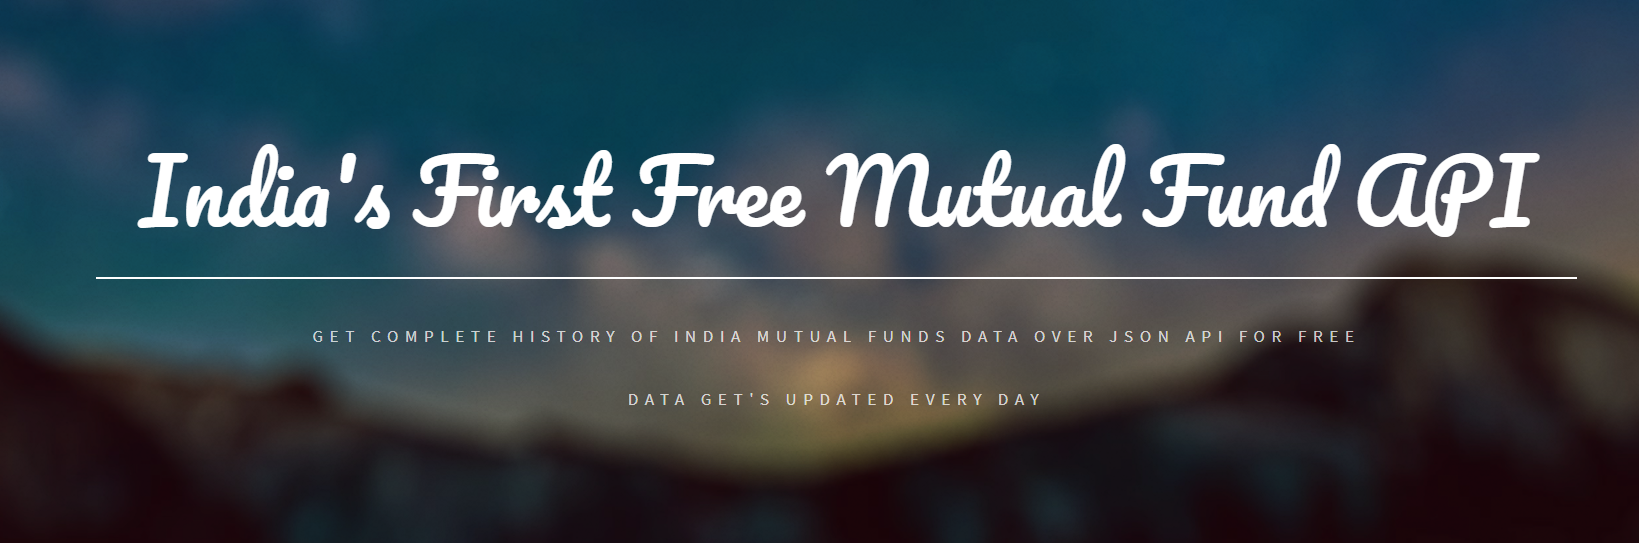

In [9]:
# https://api.mfapi.in/mf/100048
# https://api.mfapi.in/mf
   
base_url = "https://api.mfapi.in/mf"
# facts = "/facts/random?animal_type=cat&amount=500"
#Now we save the base URL and the used endpoint in variables.
first_response = requests.get(base_url)
response_list=first_response.json()
    

In [10]:
data=[]
for response in response_list:  
    data.append({
        "schemeName": response.get('schemeName'),
        "schemeCode": response.get('schemeCode')
    })
#Then we will simply transform our list into a pandas data frame with the pd.Dataframe method.
catfacts_df=pd.DataFrame(data)
api_codes = catfacts_df['schemeCode']
len(api_codes)

41946

In [17]:
my_api_codes=api_codes.to_list()
# testing_logics=my_api_codes[1:10]

In [18]:
filtered = filter(lambda my_api_codes: 100999< my_api_codes < 102000, my_api_codes)

In [19]:
my_codes = list(filtered)

In [20]:
len(my_codes)

667

In [36]:
# api_codes=[148969,100027]
import json
responsed_api_result=[]
for code in my_codes:
    code_withPath = base_url+'/'+ str(code)
    print(code , 'Data Generated')
    data_response = requests.get(code_withPath)
    responsed_api=data_response.json()
    responsed_api_result.append(responsed_api)
responsed_api_result
df = pd.json_normalize(responsed_api_result, 'data', [['meta', 'scheme_name'],['meta', 'scheme_code']])

101000
101001
101002
101003
101003
101037
101042
101042
101044
101044
101048
101049
101049
101049
101059
101065
101065
101065
101066
101066
101066
101066
101069
101069
101069
101069
101070
101070
101070
101071
101071
101071
101071
101071
101072
101072
101072
101072
101078
101078
101081
101082
101083
101084
101084
101092
101094
101095
101098
101099
101100
101113
101114
101116
101117
101118
101119
101120
101121
101122
101123
101124
101126
101127
101131
101132
101143
101143
101144
101154
101154
101155
101155
101160
101161
101161
101162
101162
101163
101163
101163
101165
101165
101169
101169
101170
101171
101172
101173
101177
101178
101179
101180
101181
101181
101181
101184
101184
101185
101186
101186
101186
101187
101187
101188
101188
101188
101190
101192
101198
101198
101199
101200
101200
101201
101202
101203
101206
101207
101208
101209
101209
101221
101222
101222
101222
101224
101224
101224
101228
101229
101230
101231
101232
101236
101236
101237
101238
101238
101242
101242
101244
101245

In [38]:
len(df)

2080004

In [37]:
df.to_csv('D://4th Semester//Assignment_CHN1//Assignment_CHN1//data_from_api//file2.csv')

In [2]:
read_data=pd.read_csv('D://4th Semester//Assignment_CHN1//Assignment_CHN1//data_from_api//file2.csv')

In [7]:
print('Generated Data')
df =read_data.drop_duplicates(subset = ["meta.scheme_name"])
# read_data.head()
df.head()

Generated Data


,Unnamed: 0,date,nav,meta.scheme_name,meta.scheme_code
0,0,14-09-2012,70.1412,Tata Life Sciences & Technology Fund - Growth,101000
1594,1594,06-08-2021,51.0732,SBI MAGNUM GILT FUND - REGULAR PLAN - GROWTH,101001
5312,5312,06-08-2021,50.0666,SBI MAGNUM CONSTANT MATURITY FUND - REGULAR PL...,101002
9030,9030,06-08-2021,16.2833,SBI Magnum Constant Maturity Fund - Regular Pl...,101003
16466,16466,12-09-2011,0.0000,Franklin India Index Tax Fund,101037
